In [1]:
#! /home/emo4002/colossus_shared3/miniconda3/bin/python3
import os
import zipfile
import numpy as np
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import model_from_json
import nibabel as nib
from sklearn.model_selection import StratifiedKFold
from scipy import ndimage
import random
from sklearn.utils import class_weight
from keras import backend as K
from joblib import parallel_backend
from sklearn.model_selection import train_test_split
import json
import sys

In [105]:
print("Loading pkled data")

cwd = os.getcwd()
data_dir = str(cwd)+"/data"

pickle_in = open(data_dir + "/all_xdata.pkl", "r+b")
x = pickle.load(pickle_in)

pickle_in = open(data_dir + "/all_ydata.pkl", "r+b")
y = pickle.load(pickle_in)

results_dir=str(cwd) 

Loading pkled data


In [15]:
print(cwd)

/mnt/shared_data3/emo4002/MSpredict/3d-cnn/code


In [4]:
def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    #volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [129]:
print("MRI scans of individuals with disabled EDSS:  " + str(len(x)))
skf=StratifiedKFold(n_splits=5,random_state=7,shuffle=True)
# Define per-fold score containers
auc_per_fold = []
loss_per_fold = []

MRI scans of individuals with disabled EDSS:  295


In [130]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.21052631578947367
0.1864406779661017


In [131]:
def get_model(width=64, height=64, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=10, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=20, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=40, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=40, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

STARTING MODEL TRAINING FOR SKFOLD SPLIT : 1
236
59
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_93 (Conv3D)           (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_93 (MaxPooling (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_94 (Conv3D)           (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_94 (MaxPooling (None, 14, 14, 14, 20)    0         
_________________________________________________________________
batch_nor

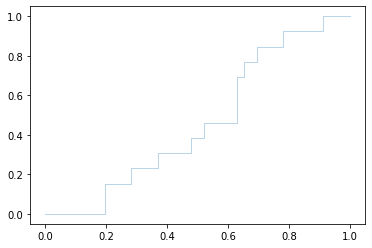

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 2
236
59
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_96 (Conv3D)           (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_96 (MaxPooling (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_96 (Batc (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_97 (Conv3D)           (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_97 (MaxPooling (None, 14, 14, 14, 20)    0         
_______________________________________________________

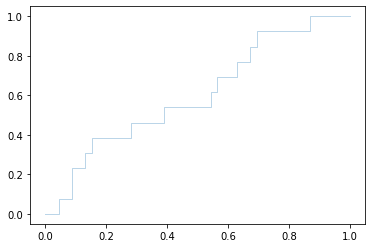

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 3
236
59
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_99 (Conv3D)           (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_99 (MaxPooling (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_99 (Batc (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_100 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_100 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

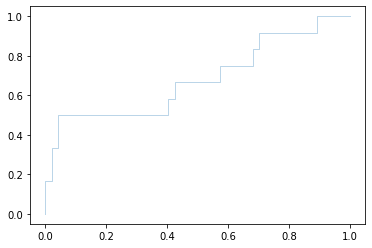

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 4
236
59
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_102 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_102 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_102 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_103 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_103 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

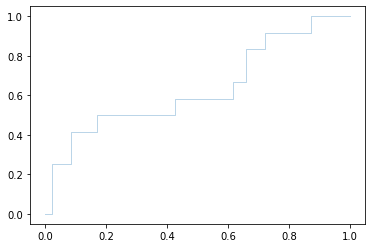

saved model to disk
STARTING MODEL TRAINING FOR SKFOLD SPLIT : 5
236
59
Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 64, 64, 64, 1)]   0         
_________________________________________________________________
conv3d_105 (Conv3D)          (None, 62, 62, 62, 10)    280       
_________________________________________________________________
max_pooling3d_105 (MaxPoolin (None, 31, 31, 31, 10)    0         
_________________________________________________________________
batch_normalization_105 (Bat (None, 31, 31, 31, 10)    40        
_________________________________________________________________
conv3d_106 (Conv3D)          (None, 29, 29, 29, 20)    5420      
_________________________________________________________________
max_pooling3d_106 (MaxPoolin (None, 14, 14, 14, 20)    0         
_______________________________________________________

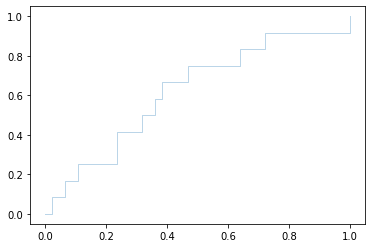

saved model to disk


In [132]:
roc_aucs=[]
tprs=[]
fprs=[]
skf_count = 0

with parallel_backend('threading', n_jobs=15):

    for train_idx, val_idx in skf.split(x,y):
        print("STARTING MODEL TRAINING FOR SKFOLD SPLIT : " + str(skf_count + 1))
        print(len(train_idx))
        print(len(val_idx))

        x_train = x[train_idx]
        y_train = y[train_idx]
        x_val = x[val_idx]
        y_val = y[val_idx]


        # Define data loaders.
        train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
        validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

        batch_size = 10
        # Augment the on the fly during training.
        train_dataset = (
            train_loader.shuffle(len(x_train))
            .map(train_preprocessing)
            .batch(batch_size)
            .prefetch(2)
        )
        # Only rescale.
        validation_dataset = (
            validation_loader.shuffle(len(x_val))
            .map(validation_preprocessing)
            .batch(batch_size)
            .prefetch(2)
        )

        # Build model.
        model = get_model(width=64, height=64, depth=64)
        model.summary()

        # Compile model.
        initial_learning_rate = 0.0001
        lr_schedule = keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
        )
        METRICS = [
            keras.metrics.AUC(name='auc')]


        model.compile(
            loss="binary_crossentropy",
            optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
            metrics=METRICS
        )

        # Define callbacks.
        checkpoint_cb = keras.callbacks.ModelCheckpoint(results_dir + "/model_" + str(skf_count) + ".h5", save_best_only=True)

        # Train the model, doing validation at the end of each epoch
        epochs = 20
        history=model.fit(
            train_dataset,
            validation_data=validation_dataset,
            epochs=epochs,
            shuffle=True,
            verbose=1,
            callbacks=[checkpoint_cb]
        )

        # Generate cross-validation metrics
        scores = model.evaluate(x_val, y_val, verbose=0)
        print(f'Score for fold {skf_count}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')
        loss_per_fold.append(scores[0])
        
        # Predict y for x validation
        y_pred=model(x_val)
        fpr, tpr, thresh=roc_curve(y_val, y_pred)
                                   
        roc_auc=auc(fpr, tpr)
        fprs.append(fpr)
        tprs.append(tpr)
        
        roc_aucs.append(roc_auc)#store AUC per fold
        
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC=%0.2f)'%(skf_count+1, roc_auc)) 
        plt.show()
        
        model_json=model.to_json()
        with open(results_dir + "/model_" + str(skf_count)+".json", "w") as json_file:
            json_file.write(model_json)

        model.save_weights(results_dir + "/model_" + str(skf_count) + ".h5")
        print("saved model to disk")        
        skf_count = skf_count + 1 #increase fold number

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


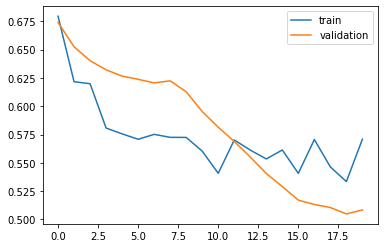

In [133]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])

(29,)

0.6013211888327522


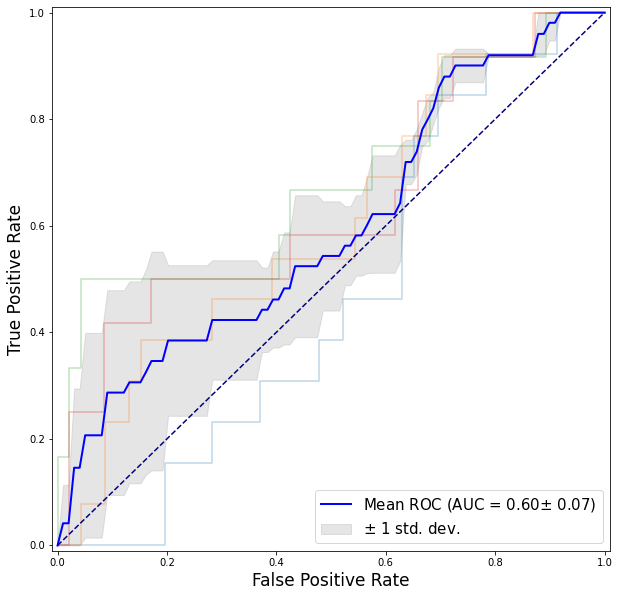

In [156]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
tpr=[]
mean_fpr = np.linspace(0,1,100)

for i in range(0,4):
    tpr.append(np.interp(mean_fpr, fprs[i], tprs[i]))
    tpr[-1][0]=0
    
mean_tpr=np.mean(tpr,axis=0)
mean_tpr[-1]=1

stdtpr=np.std(tprall, axis=0)
tprs_upper=np.minimum(mean_tpr+stdtpr,1)
tprs_lower=np.maximum(mean_tpr-stdtpr,0)

mean_auc=auc(mean_fpr, mean_tpr)
std_auc=np.std(roc_aucs)
#mean_fprs=np.mean(fprs)
#mean_tprs=np.mean(tprs)
plt.figure(figsize=(10,10))
for i in range(0,4):
    plt.plot(fprs[i], tprs[i], alpha=0.3)
    
plt.plot([0,1],[0,1], color='navy', linestyle='--')
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label=r'Mean ROC (AUC = %0.2f$\pm$ %0.2f)'%(mean_auc, std_auc))
plt.fill_between(mean_fpr, tprs_lower, tprs_upper,  color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.title
plt.legend(loc="lower right", prop={'size':15})

print(np.mean(roc_aucs))

In [85]:
skf_count


10

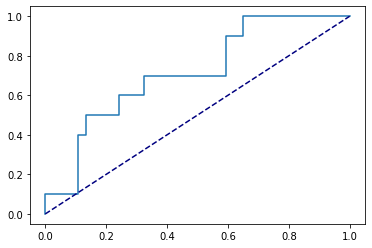

In [71]:

y_pred=model(x_val)
fpr, tpr, thresh=roc_curve(y_val, y_pred)
print(auc(fpr, tpr))
plt.plot(fpr, tpr)
